<a href="https://colab.research.google.com/github/coco-in-bluemoon/three-minute-deep-learning-keras/blob/main/notebook/chapter6_2_ae_conv_mnist_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**합성곱 AE 모델링**

In [1]:
from keras import layers, models

In [2]:
def Conv2D(filters, kernel_size, padding='same', activation='relu'):
    return layers.Conv2D(filters=filters, kernel_size=kernel_size, padding=padding, activation=activation)

In [3]:
class AE(models.Model):
    def __init__(self, orig_shape):

        original = layers.Input(shape=orig_shape)

        # Encoding 1
        x = Conv2D(4, (3, 3))(original)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)

        # Encoding 2
        x = Conv2D(8, (3, 3))(x)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)

        # Encoding 3 - encoded image with 7x7
        z = Conv2D(1, (7, 7))(x)

        # Decoding 1
        y = Conv2D(16, (3, 3))(z)
        y = layers.UpSampling2D((2, 2))(y)

        # Decoding 2
        y = Conv2D(8, (3, 3))(y)
        y = layers.UpSampling2D((2, 2))(y)

        # Decoding 3
        y = Conv2D(4, (3, 3))(y)

        # Output
        output = Conv2D(1, (3, 3), activation='sigmoid')(y)

        super(AE, self).__init__(original, output)

        self.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        self.original = original
        self.z = z

    def Encoder(self):
        return models.Model(self.original, self.z)

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc=0)

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc=0)

def show_ae(autoencoder):
    encoder = autoencoder.Encoder()

    encoded_imgs = encoder.predict(X_test)
    decoded_imgs = autoencoder.predict(X_test)

    n = 10
    for i in range(n):
        ax = plt.subplot(3, n, i+1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i+1+n)
        plt.imshow(encoded_imgs[i].reshape(7, 7))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i+1+n+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [9]:
def main():
    epochs = 50
    batch_size = 128

    autoencoder = AE(orig_shape=(28, 28, 1))

    history = autoencoder.fit(
        X_train, X_train,
        epochs=epochs, batch_size=batch_size,
        validation_data=(X_test, X_test)
    )

    plot_loss(history)
    plt.show()

    plot_acc(history)
    plt.show()

    show_ae(autoencoder)
    plt.show()

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2145 - accuracy: 0.7990 - val_loss: 0.1141 - val_accuracy: 0.8093
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1089 - accuracy: 0.8106 - val_loss: 0.1033 - val_accuracy: 0.8108
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1026 - accuracy: 0.8117 - val_loss: 0.0994 - val_accuracy: 0.8111
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0997 - accuracy: 0.8121 - val_loss: 0.0971 - val_accuracy: 0.8114
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0977 - accuracy: 0.8124 - val_loss: 0.0958 - val_accuracy: 0.8121
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0963 - accuracy: 0.8127 - val_loss: 0.0944 - val_accuracy: 0.8117
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0951 - accuracy: 0.8128 - val_loss: 0.0934 - val_accuracy: 0.8122
Epoch 

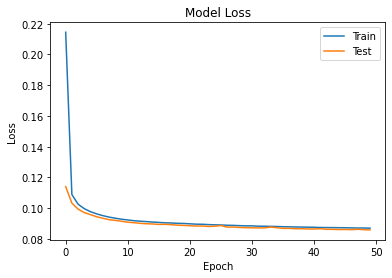

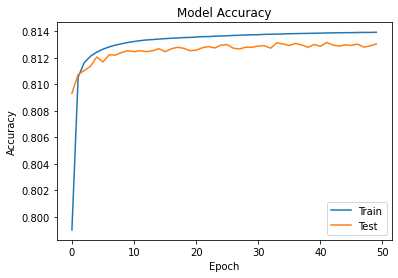

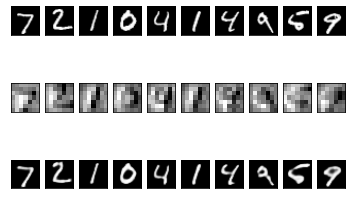

In [10]:
main()